## Directed graph symmetrization

Fitch, K. (2018). Metric preserving directed graph symmetrization, 1–16. Retrieved from http://arxiv.org/abs/1802.09829

Strongly connected, positively weighted graph.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
N = 20
g = nx.scale_free_graph(N)
while not nx.is_strongly_connected(g):
    e1 = np.random.randint(N)
    e2 = np.random.randint(N)
    # print(e1, e2)
    g.add_edge(e1, e2)

Compute the Laplacian for the graph.

In [3]:
A = nx.adjacency_matrix(g)
D = np.diag(np.asarray(np.sum(nx.adjacency_matrix(g), axis=1)).reshape(-1))
L = D - A
np.linalg.matrix_rank(L)

19

Orthonormal basis 
$Q \in \mathbb{R}^{(N-1)\times N}$

In [4]:
from scipy.linalg import orth

In [5]:
Q = np.transpose(orth(L))
np.shape(Q)

(19, 20)

$Q\mathbf{1}_n = \mathbf{0}$

In [6]:
np.sum(Q, axis=1)

array([-2.26404248,  0.31040736, -0.15227898, -0.67154792,  0.3283503 ,
        0.30849148, -0.01951389, -0.85311264,  0.20118445,  0.21751457,
        0.09972203,  1.04711688,  1.02580861, -1.13194748, -0.1362201 ,
       -0.63760544, -1.04063442, -0.55910604, -1.11299702])

$QQ^T = I_{(n-1)}$

In [7]:
np.matmul(Q, np.transpose(Q))

array([[ 1.00000000e+00, -7.54184866e-16,  9.45716790e-17,
        -5.24226963e-17, -1.24779869e-16,  1.08120174e-16,
        -4.13639470e-17,  1.08761511e-16,  3.01088464e-17,
        -6.85654350e-18,  5.14113882e-17, -4.22783712e-17,
        -1.11278013e-17,  3.27492375e-17,  6.55168260e-17,
         1.11973227e-16, -1.40160941e-17,  1.96373623e-17,
         8.88377904e-18],
       [-7.54184866e-16,  1.00000000e+00, -4.65882686e-16,
         1.58387035e-16, -1.00224840e-17, -5.46030154e-18,
         4.26618736e-16,  1.42767124e-16, -8.13066434e-17,
        -6.92114179e-17, -1.14884699e-17,  9.99296770e-17,
         6.53713154e-17, -1.47954749e-16, -8.96492618e-17,
        -1.11796000e-16, -1.50116924e-17,  5.39123605e-18,
        -2.49201458e-17],
       [ 9.45716790e-17, -4.65882686e-16,  1.00000000e+00,
        -4.79399599e-16,  2.15025044e-16,  2.46496025e-16,
        -2.32814223e-16,  2.80238480e-16, -1.86198568e-16,
         4.00566546e-16, -1.60762422e-17, -3.27636140e-17,
    

Compute Reduced Laplacian

$\bar{L} = QLQ^T$

In [8]:
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))

Solve the Lyapunov equation
$\bar { L } \Sigma + \Sigma \bar { L } ^ { T } = I _ { n - 1 }$

In [9]:
from scipy.linalg import solve_lyapunov

In [10]:
sigma = solve_lyapunov(rL, np.identity(N-1))

Project from $\mathbb { R } ^ { ( n - 1 ) \times ( n - 1 ) }$ to $\mathbb { R } ^ { n \times n }$ by $X = 2 Q ^ { T } \Sigma Q$

In [11]:
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))

Pseudoinverse $\hat { L } _ { u } = X ^ { + }$

In [12]:
eqL = np.linalg.pinv(x)

In [13]:
np.shape(eqL)

(20, 20)

Check eigenvalues of both Laplacian matrices

In [14]:
u1, s1, v1 = np.linalg.svd(L)
s1

array([1.03994133e+01, 8.18068672e+00, 7.25605332e+00, 6.61718213e+00,
       6.03197917e+00, 5.85389950e+00, 5.40700428e+00, 5.11970691e+00,
       4.70548828e+00, 3.63747223e+00, 3.42313710e+00, 3.14696905e+00,
       2.93416358e+00, 2.68135211e+00, 2.43994205e+00, 2.00012459e+00,
       1.49910071e+00, 8.76414297e-01, 7.93006895e-01, 9.58551150e-16])

In [15]:
u2, s2, v2 = np.linalg.svd(eqL)
s2

array([8.06795472e+00, 7.80833368e+00, 6.99931226e+00, 6.38968846e+00,
       5.77892151e+00, 5.61918921e+00, 5.13986588e+00, 4.67998005e+00,
       4.44698993e+00, 3.37812664e+00, 3.24262607e+00, 2.83484221e+00,
       2.72786754e+00, 2.39940427e+00, 2.13502996e+00, 1.80695414e+00,
       1.06490173e+00, 8.12144950e-01, 6.67866776e-01, 1.94587913e-16])

In [16]:
from scipy.integrate import solve_ivp

In [17]:
init = np.random.rand(N)
f1 = lambda t,x: np.asarray(-L.dot(x))[0]
f1(0,init)
res1 = solve_ivp(fun=f1, t_span=[0,1000], y0=init)
f2 = lambda t,x: -eqL.dot(x)
res2 = solve_ivp(fun=f2, t_span=[0,1000], y0=init)

In [18]:
type(L)

numpy.matrixlib.defmatrix.matrix

In [19]:
type(eqL)

numpy.ndarray

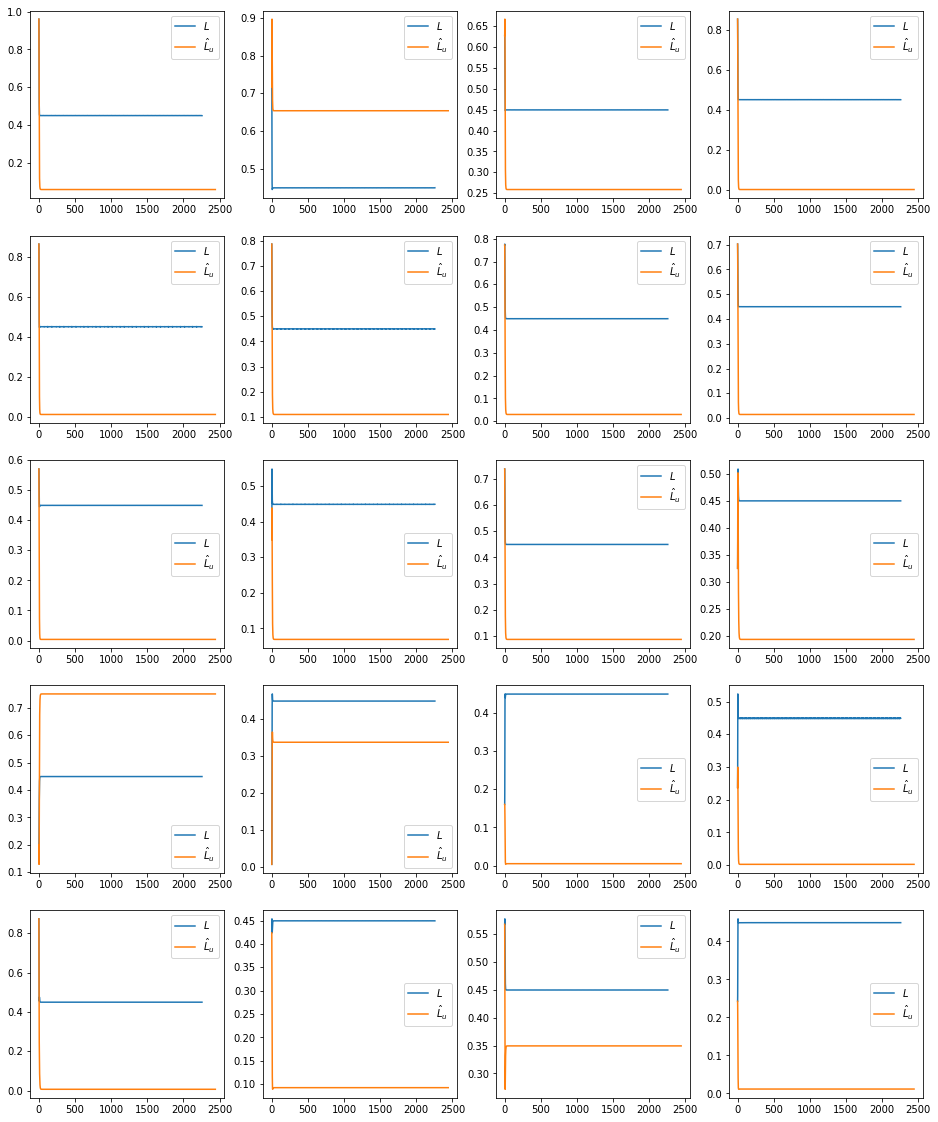

In [20]:
plt.figure(figsize=(16,20))
for i in np.arange(0,N):
    plt.subplot(5,4,i+1)
    plt.plot(res1.y[i,:], label=r'$L$')
    plt.plot(res2.y[i,:], label=r'$\hat{L}_u$')
    plt.legend()

In [24]:
np.mean(res2.y[:,-1])

0.15247981210543396